In [11]:
from PIL import Image

In [60]:
import re

def get_file_name(filename):
    items = re.findall('./[a-zA-Z]*/._(.*).PNG$', filename)
    if len(items) > 0:
        return items[0]
    else:
        items = re.findall('./[a-zA-Z]*/(.*).PNG$', filename)
        if len(items) > 0:
            return items[0]
        else:
            return 'default'


### Loading Ecosystem Image

CloudFree


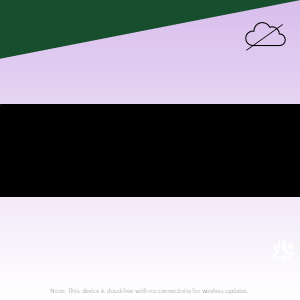

In [61]:
ecosystem_filename = './ecosystems/CloudFree.PNG'

def read_ecosystem_image(filename):    
    ecosystem_img_raw = Image.open(filename)
    ecosystem_name = get_file_name(ecosystem_img_raw.filename)
    ecosystem_img = ecosystem_img_raw.resize(
        (300, 300),
        resample=Image.BICUBIC)
    return (ecosystem_name, ecosystem_img)

# ecosystem_img.width, ecosystem_img.height, components_width, components_height
(ecosystem_name, ecosystem_img) = read_ecosystem_image(ecosystem_filename)
print(ecosystem_name)
ecosystem_img

### Loading Actuator Images

H6XXT


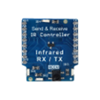

In [54]:
actuator_filename = './sensors/S_H6XXT.PNG'
# components_width = 100
# components_height = 100

def read_iot_image(filename):
    components_width = 100
    components_height = 100
    iot_img = Image.open(filename)
    iot_img_name = get_file_name(iot_img.filename)
    iot_img_resized = iot_img.resize(
    (components_width, components_height),
    resample=Image.BICUBIC)
    return (iot_img_name, iot_img_resized)

(sensor_name, actuator_img_resized) = read_iot_image(actuator_filename)
print(sensor_name)
actuator_img_resized

### Construct Solutions Image

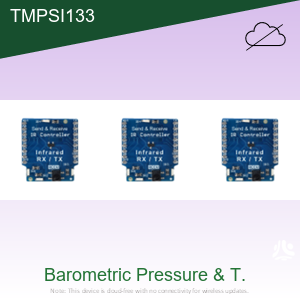

In [89]:
from PIL import ImageDraw
from PIL import ImageFont

def get_application_text_coordinates(solutions_image, draw, text, font):
    left,top,right,bottom = draw.textbbox((10,260), align="center", text=text, font=font)
    x = int((solutions_image.width - right) / 2)
    y = top
    return x, y

def add_solution_texts(solutions_image, iot_component_name, application_text):
    draw = ImageDraw.Draw(solutions_image)
    font = ImageFont.truetype("arial-font/arial.ttf", 18)
    
    draw.text((10, 5),iot_component_name,(255,255,255), font=font)
    
    x, y = get_application_text_coordinates(solutions_image, draw, application_text, font)
    draw.text((x, y),application_text,(36, 116, 54), font=font)

def create_solution_image(ecosystem_image, sensor_image, microcontroller_image, actuator_image, iot_component_name, application_text):
    solutions_img = Image.new("RGB", (300,300))
    components_width = int(solutions_img.width / 3)
    components_height = int(solutions_img.height / 3)
    solutions_img.paste(ecosystem_image, (0, 0))
    solutions_img.paste(sensor_image, (0, components_height))
    solutions_img.paste(microcontroller_image, (components_width, components_height))
    solutions_img.paste(actuator_image, (components_width * 2, components_height))
    add_solution_texts(solutions_img, iot_component_name, application_text)
    return solutions_img

application_text = 'Barometric Pressure & T.'
solutions_img = create_solution_image(ecosystem_img, actuator_img_resized, actuator_img_resized, actuator_img_resized, sensor_name, application_text)
# solutions_img.save(f"solutions/sensor_mic_actuator_ecosystem.png")
solutions_img

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('./applications-raw.xlsx', sheet_name='Application-Names')
df.head()

,Number,Application,Sensor,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,1.85,NaN,NaN,1.85,1.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Barometer-1,BMP180,0.81,0.81,1.0,NaN,0.81,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,Hygrometer-1,DHT11,0.94,0.94,2.0,NaN,0.94,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,Hygro-Thermometer-1,SHT30,1.3,1.3,NaN,3,NaN,1.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
res = df['Application'].get(2)
type(res)

str

In [4]:
def read_applications_file(path, sheet_name):
    df = pd.read_excel(path, sheet_name=sheet_name)    
    df_shrunk = df.loc[:, ['Sensor', 'Actuator', 'Purpose']]
    df_shrunk['Sensor'] = df_shrunk['Sensor'].apply(lambda x: str(x).strip().lower() if type(x) == str else None)
    df_shrunk['Actuator'] = df_shrunk['Actuator'].apply(lambda x: str(x).strip().lower() if type(x) == str else None)
    df_shrunk['Purpose'] = df_shrunk['Purpose'].apply(lambda x: str(x).strip() if type(x) == str else None)    
    df_shrunk = df_shrunk.dropna(how='any')
    return df_shrunk
df_shrunk = read_applications_file('./applications-raw.xlsx', 'Application-Names')
df_shrunk.head(30)

,Sensor,Actuator,Purpose
2,bmp180,0.66-oled,Temperature & Humidity
3,dht11,0.66-oled,Temperature & Humidity
4,sht30,0.66-oled,Temperature & Humidity
5,bh1750,0.66-oled,Ambient Light
6,hp303b,0.66-oled,Barometric Pressure & Temperature
7,h6xxt,0.66-oled,Infrared Radiation
8,pir,0.66-oled,Passive Infrared Radiation
9,dht22,0.66-oled,Temperature & Humidity
10,ds18b20,0.66-oled,Temperature
11,button,0.66-oled,Human Push


In [68]:
sensor = 'bmp180'
actuator = '0.661-oled'
def get_purpose(df, sensor, actuator):
    sensor_df = df.query(f"Sensor == '{sensor}'")
    # actuator_df = sensor_df.query(f"Actuator == '{actuator}'")
    # Check if actuator was found otherwise use any oled display whose record is available
    # if actuator_df.empty and 'oled' in actuator:
    #     actuator_df = sensor_df[sensor_df['Actuator'].str.contains('oled')]
    # Get the row index of the record queried
    result_index = list(sensor_df.to_dict()['Purpose'].keys())
    if len(result_index) > 0:
        purpose = sensor_df['Purpose'].get(result_index[0])
        return purpose
    else:
        return ''

purpose = get_purpose(df_shrunk, sensor, actuator)
purpose

'Temperature & Humidity'

In [70]:
from os import listdir, mkdir
from os.path import isfile, join, exists

In [51]:
actuators_path = './actuators'
sensors_path = './sensors'
microcontrollers_path = './microcontrollers'
ecosystems_path = './ecosystems'

def list_files(directory_path):
    onlyfiles = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]
    return (directory_path, onlyfiles)

onlyfiles = list_files(microcontrollers_path)
onlyfiles

('./microcontrollers', ['M_ESP32.PNG', 'M_D1-MINI.PNG', 'M_C3-MINI.PNG'])

In [96]:
# (sensors_dir, sensors) = list_files(sensors_path)
# (actuators_dir, actuators) = list_files(actuators_path)
# (microcontrollers_dir, microcontrollers) = list_files(microcontrollers_path)
# (ecosystems_dir, ecosystems) = list_files(ecosystems_path)
# base_path = 'solutions'

def prepare_iot_component(components_path, solutions_base_dir, hasDir=True, isEcosystem=False):
    (component_name, component_image) = read_ecosystem_image(components_path) if isEcosystem else read_iot_image(components_path)
    iot_component_dir = join(solutions_base_dir, component_name)
    if not exists(iot_component_dir) and hasDir:
        mkdir(iot_component_dir)
    return (component_name, component_image, iot_component_dir)

def generate_solutions(filenames, solutions_path):
    (sensors_dir, sensors) = filenames['sensors']
    (microcontrollers_dir, microcontrollers) = filenames['microcontrollers']
    (actuators_dir, actuators) = filenames['actuators']
    (ecosystems_dir, ecosystems) = filenames['ecosystems']
    
    for sensor in sensors:
        (sensor_name, sensor_image, sensor_dir) = prepare_iot_component(join(sensors_dir, sensor), solutions_path)
        for microcontroller in microcontrollers:
            (microcontroller_name, microcontroller_image, microcontroller_dir) = prepare_iot_component(join(microcontrollers_dir, microcontroller), sensor_dir)
            for ecosystem in ecosystems:
                (ecosystem_name, ecosystem_image, ecosystem_dir) = prepare_iot_component(join(ecosystems_dir, ecosystem), microcontroller_dir, isEcosystem=True)
                for actuator in actuators:
                    (actuator_name, actuator_image, *others) = prepare_iot_component(join(actuators_dir, actuator), ecosystem_dir, hasDir=False)
                    purpose = get_purpose(df_shrunk, sensor_name.lower(), actuator_name.lower())
                    solutions_img = create_solution_image(ecosystem_image, sensor_image, microcontroller_image, actuator_image, sensor_name, purpose)
                    solutions_img.save(f"{ecosystem_dir}/{sensor_name}_{microcontroller_name}_{actuator_name}_{ecosystem_name}.png")

generate_solutions(
    {
        'sensors': list_files(sensors_path),
        'microcontrollers': list_files(microcontrollers_path),
        'actuators': list_files(actuators_path),
        'ecosystems': list_files(ecosystems_path)
    },
    'solutions'
)
print('Done!')

Done!
